<a href="https://colab.research.google.com/github/Patrick4350/OIBSIP/blob/main/Oasis_Infobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/Patrick4350/OIBSIP.git

Cloning into 'OIBSIP'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (13/13), done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd OIBSIP/


/content/OIBSIP


In [ ]:
%%writefile unemployment.py

Overwriting unemployment.py


In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

In [ ]:
df = pd.read_csv('/content/OIBSIP/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
#Checking basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
#Number of null data elements
df.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
#Paticular cells where no data elements are found
df[df['Region'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing cells with no elements
df.cleaned = df.dropna(inplace=True)

In [ ]:
#All our elements have data values
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

In [ ]:
#Description of dataset
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
#Bar plot of estimated unemployment rate per region in descending order
fig = px.bar(df, x='Region', y=' Estimated Unemployment Rate (%)', color='Region', title='Unemployment Rate in India')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Tripura is the region with the highest unemployment rate
Sikkim is the region witht the lowest unemployment rate

In [ ]:
#Bar plot of estimated employed people per region
fig = px.bar(df, x='Region', y=' Estimated Employed', color='Region', title='Estimated Employed People in India')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Uttar Pradesh is the region with the highest number of employed people
Sikkim is the region with the lowest number of employed people

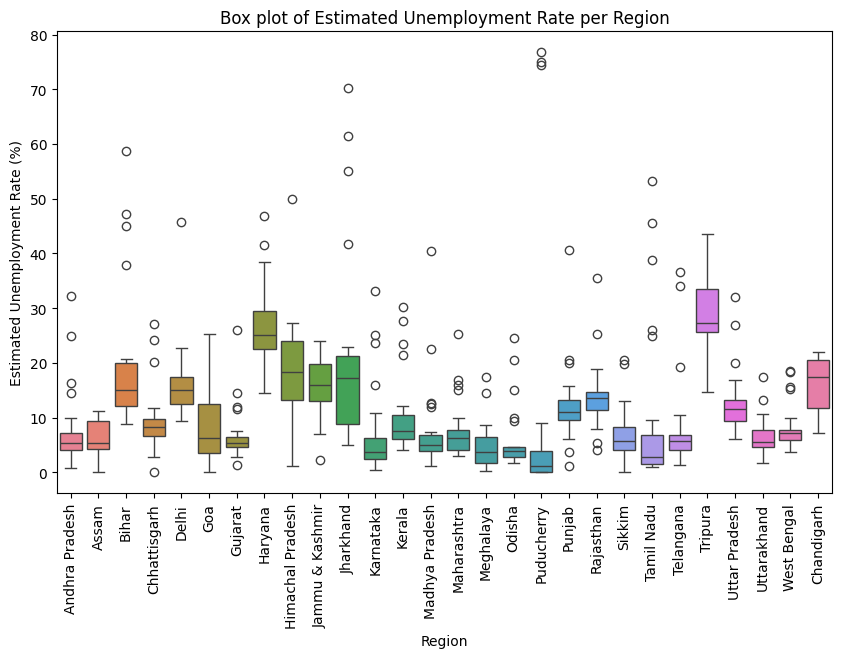

In [ ]:
#Box plot of estimated unemployment rate per region
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Region', y = ' Estimated Unemployment Rate (%)', hue = 'Region', data = df)
plt.xticks(rotation=90)
plt.title('Box plot of Estimated Unemployment Rate per Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()


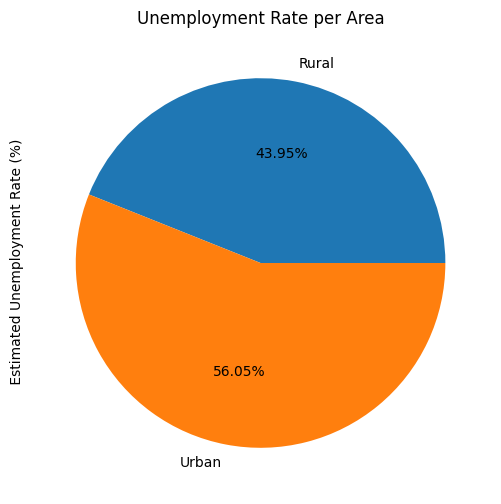

In [ ]:
#Pie chart of unemployment rate per area
plt.figure(figsize=(10, 6))
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.2f%%')
plt.title('Unemployment Rate per Area')
plt.show()

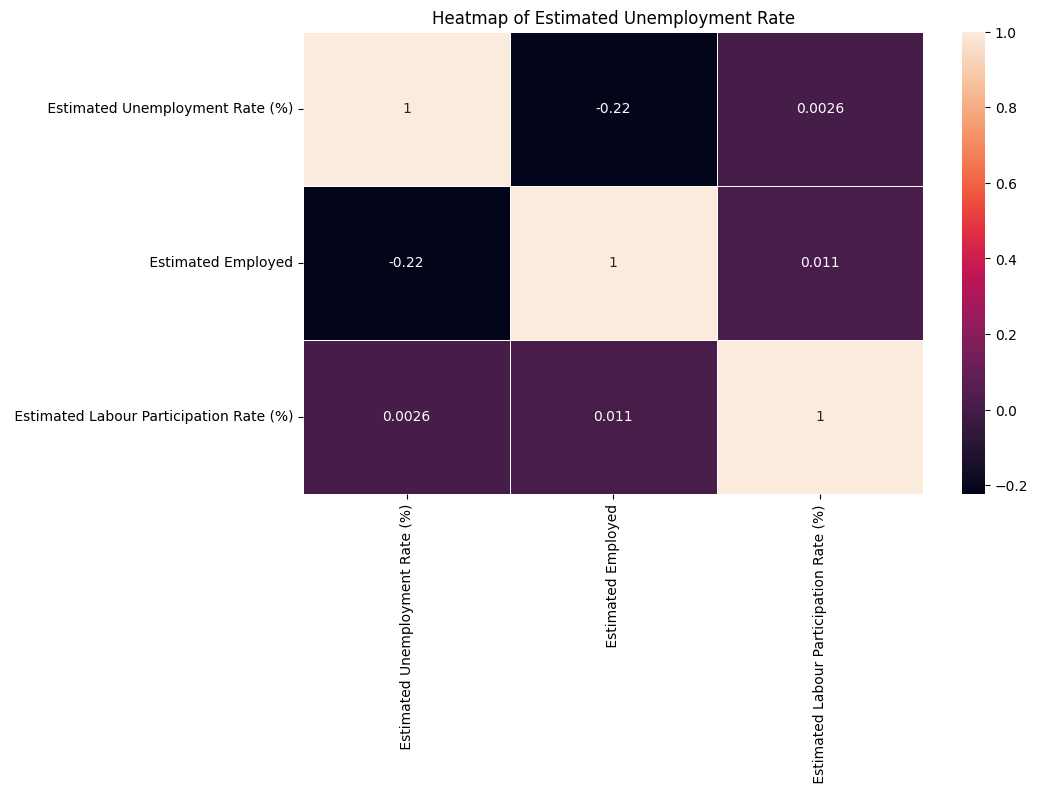

In [ ]:
#Heatmap
plt.figure(figsize= (10, 6))
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Heatmap of Estimated Unemployment Rate')
plt.show()

1.   There is an indirect proportion between unemployment rate and employed people. As the unemployment rate increases, the number of employed people decreases and vice versa

2.   The unemployment rate has slight significant change on the labour participation rate

3.   An increase in employment may marginally enhance labor force participation, though this impact is not highly pronounced.














In [75]:
#Average unemployment rate per time
estimated_unemployment_per_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Unemployment Rate per Time\n", estimated_unemployment_per_time)


Average Unemployment Rate per Time
            Date   Estimated Unemployment Rate (%)
0    31-05-2020                         24.875294
1    30-04-2020                         23.641569
2    30-06-2020                         11.903600
3    31-03-2020                         10.700577
4    29-02-2020                          9.964717
5    31-01-2020                          9.950755
6    31-10-2019                          9.900909
7    30-11-2019                          9.868364
8    31-08-2019                          9.637925
9    31-12-2019                          9.497358
10   30-06-2019                          9.303333
11   30-09-2019                          9.051731
12   31-07-2019                          9.033889
13   31-05-2019                          8.874259


In [76]:
#Average unemployment rate per region
estimated_unemployment_per_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Unemployment Rate per Region\n", estimated_unemployment_per_region)



Average Unemployment Rate per Region
               Region   Estimated Unemployment Rate (%)
0            Tripura                         28.350357
1            Haryana                         26.283214
2          Jharkhand                         20.585000
3              Bihar                         18.918214
4   Himachal Pradesh                         18.540357
5              Delhi                         16.495357
6    Jammu & Kashmir                         16.188571
7         Chandigarh                         15.991667
8          Rajasthan                         14.058214
9      Uttar Pradesh                         12.551429
10            Punjab                         12.031071
11        Puducherry                         10.215000
12            Kerala                         10.123929
13        Tamil Nadu                          9.284286
14               Goa                          9.274167
15      Chhattisgarh                          9.240357
16       West Bengal      

In [77]:
#Average unemployment rate per area
estimated_unemployment_per_area = df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Unemployment Rate per Area\n", estimated_unemployment_per_area)



Average Unemployment Rate per Area
     Area   Estimated Unemployment Rate (%)
0  Urban                         13.166614
1  Rural                         10.324791


In [78]:
#Highest unemployment rate per month
highest_unemployment_per_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()
print("\nHighest Unemployment Rate per Month\n", highest_unemployment_per_month)



Highest Unemployment Rate per Month
            Date   Estimated Unemployment Rate (%)
0    30-04-2020                             76.74
1    31-05-2020                             75.00
2    30-06-2020                             35.57
3    31-05-2019                             34.69
4    31-01-2020                             34.37
5    29-02-2020                             33.88
6    30-09-2019                             33.57
7    31-12-2019                             33.48
8    31-08-2019                             33.45
9    31-03-2020                             31.61
10   31-10-2019                             27.54
11   30-11-2019                             27.27
12   30-06-2019                             26.64
13   31-07-2019                             25.81


In [79]:
#Lowest unemployment rate per month
lowest_unemployment_per_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].min().sort_values(ascending=False).reset_index()
print("\nLowest Unemployment Rate per Month\n", lowest_unemployment_per_month)



Lowest Unemployment Rate per Month
            Date   Estimated Unemployment Rate (%)
0    31-05-2020                              2.22
1    31-10-2019                              1.13
2    31-03-2020                              0.62
3    31-01-2020                              0.57
4    31-12-2019                              0.41
5    31-08-2019                              0.37
6    29-02-2020                              0.00
7    30-04-2020                              0.00
8    30-06-2019                              0.00
9    30-06-2020                              0.00
10   30-09-2019                              0.00
11   30-11-2019                              0.00
12   31-05-2019                              0.00
13   31-07-2019                              0.00


In [80]:
#Average number of employed people per region
estimated_employed_per_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
print("\nAverage People Employed per Region\n", estimated_employed_per_region)



Average People Employed per Region
               Region   Estimated Employed
0      Uttar Pradesh         2.809483e+07
1        Maharashtra         1.999020e+07
2        West Bengal         1.719854e+07
3              Bihar         1.236619e+07
4         Tamil Nadu         1.226955e+07
5            Gujarat         1.140201e+07
6     Madhya Pradesh         1.111548e+07
7          Karnataka         1.066712e+07
8          Rajasthan         1.004106e+07
9     Andhra Pradesh         8.154093e+06
10         Telangana         7.939663e+06
11            Odisha         6.545747e+06
12             Assam         5.354772e+06
13            Punjab         4.539362e+06
14         Jharkhand         4.469240e+06
15            Kerala         4.425900e+06
16      Chhattisgarh         4.303499e+06
17           Haryana         3.557072e+06
18             Delhi         2.627513e+06
19   Jammu & Kashmir         1.799932e+06
20       Uttarakhand         1.390228e+06
21  Himachal Pradesh         1.059824e+

In [81]:
#Average labour participation rate per region
estimated_labor_per_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Labour Participation Rate per Region\n", estimated_employed_per_region)



Average Labour Participation Rate per Region
               Region   Estimated Employed
0      Uttar Pradesh         2.809483e+07
1        Maharashtra         1.999020e+07
2        West Bengal         1.719854e+07
3              Bihar         1.236619e+07
4         Tamil Nadu         1.226955e+07
5            Gujarat         1.140201e+07
6     Madhya Pradesh         1.111548e+07
7          Karnataka         1.066712e+07
8          Rajasthan         1.004106e+07
9     Andhra Pradesh         8.154093e+06
10         Telangana         7.939663e+06
11            Odisha         6.545747e+06
12             Assam         5.354772e+06
13            Punjab         4.539362e+06
14         Jharkhand         4.469240e+06
15            Kerala         4.425900e+06
16      Chhattisgarh         4.303499e+06
17           Haryana         3.557072e+06
18             Delhi         2.627513e+06
19   Jammu & Kashmir         1.799932e+06
20       Uttarakhand         1.390228e+06
21  Himachal Pradesh         